C:\Users\zxcop\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\zxcop\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\zxcop\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


ความเร็วของการหมุนมอเตอร์คือ : 3.8013157358751877


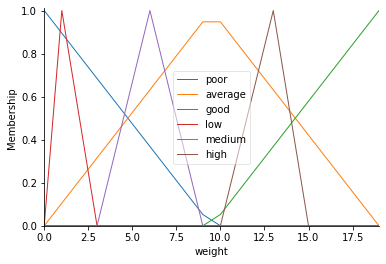

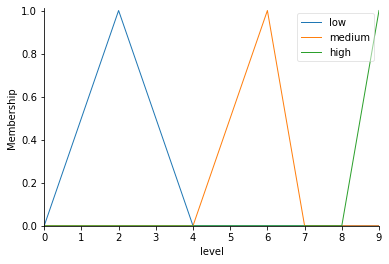

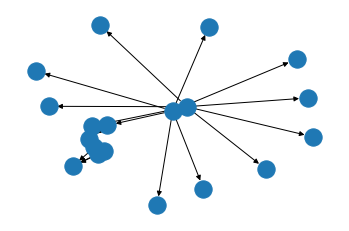

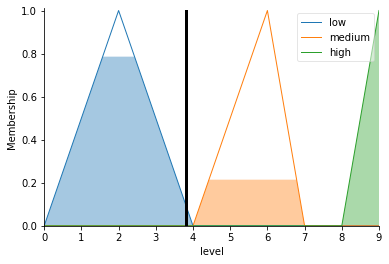

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
weight = ctrl.Antecedent(np.arange(0, 20, 1), 'weight')
amount = ctrl.Antecedent(np.arange(0, 15, 1), 'amount')
level = ctrl.Consequent(np.arange(0, 10, 1), 'level')

# Auto-membership function population is possible with .automf(3, 5, or 7)
weight.automf(3)
amount.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
weight['low'] = fuzz.trimf(weight.universe, [0, 1, 3])
weight['medium'] = fuzz.trimf(weight.universe, [3, 6, 9])
weight['high'] = fuzz.trimf(weight.universe, [10, 13 ,15])

amount['low'] = fuzz.trimf(amount.universe, [0, 5, 10])
amount['medium'] = fuzz.trimf(amount.universe, [10, 15, 17])
amount['high'] = fuzz.trimf(amount.universe, [18, 19, 20])

level['low'] = fuzz.trimf(level.universe, [0, 2, 4])
level['medium'] = fuzz.trimf(level.universe, [4, 6, 7])
level['high'] = fuzz.trimf(level.universe, [8, 9, 10])

# You can see how these look with .view()
#quality['average'].view()
weight.view()
level.view()
rule1 = ctrl.Rule(weight['poor'] | amount['poor'], level['low'])
rule2 = ctrl.Rule(amount['average'], level['medium'])
rule3 = ctrl.Rule(amount['good'] | weight['good'], level['high'])

rule4 = ctrl.Rule(weight['poor'] | amount['poor'], level['low'])
rule5 = ctrl.Rule(amount['average'], level['medium'])
rule6 = ctrl.Rule(amount['good'] | weight['good'], level['high'])

rule7 = ctrl.Rule(weight['poor'] | amount['poor'], level['low'])
rule8 = ctrl.Rule(amount['average'], level['medium'])
rule9 = ctrl.Rule(amount['good'] | weight['good'], level['high'])


rule1.view()
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['weight'] = 20
tipping.input['amount'] = 1.5

# Crunch the numbers
tipping.compute()
print("ความเร็วของการหมุนมอเตอร์คือ :",tipping.output['level'])
level.view(sim=tipping)